In [1]:
import pandas as pd

df = pd.read_csv("../data/insurance_claims_event_log.csv")

df.head()


,case_id,activity_name,timestamp,claimant_name,agent_name,adjuster_name,claim_amount,claimant_age,type_of_policy,car_make,car_model,car_year,type_of_accident,user_type
0,a626bc58-a7b2-4eff-aca9-2a622cd0c492,First Notification of Loss (FNOL),2020-09-24 14:08:42.423530,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
1,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Assign Claim,2020-10-13 03:51:28.627923,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
2,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Claim Decision,2020-10-14 22:30:14.948970,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
3,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Set Reserve,2020-10-24 11:49:39.053890,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
4,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Payment Sent,2020-10-27 05:46:04.378718,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA


In [2]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   case_id           180000 non-null  str    
 1   activity_name     180000 non-null  str    
 2   timestamp         180000 non-null  str    
 3   claimant_name     180000 non-null  str    
 4   agent_name        180000 non-null  str    
 5   adjuster_name     180000 non-null  str    
 6   claim_amount      180000 non-null  float64
 7   claimant_age      180000 non-null  int64  
 8   type_of_policy    180000 non-null  str    
 9   car_make          180000 non-null  str    
 10  car_model         180000 non-null  str    
 11  car_year          180000 non-null  int64  
 12  type_of_accident  180000 non-null  str    
 13  user_type         180000 non-null  str    
dtypes: float64(1), int64(2), str(11)
memory usage: 19.2 MB


In [3]:
df = df.rename(columns={
    "case ID": "case_id",
    "activity name": "activity",
    "timestamp": "timestamp"
})


In [4]:
df["timestamp"] = pd.to_datetime(df["timestamp"])


In [5]:
df = df.sort_values(by=["case_id", "timestamp"])


In [6]:
df.head()

,case_id,activity_name,timestamp,claimant_name,agent_name,adjuster_name,claim_amount,claimant_age,type_of_policy,car_make,car_model,car_year,type_of_accident,user_type
75954,000112d5-9d04-450f-820f-3edfc0626cf9,First Notification of Loss (FNOL),2022-04-19 01:47:54.857481,Kimberly Collins,Hannah Lopez,Joy Simpson,9266.19,60,Comprehensive,Hyundai,Elantra,2021,Head-on,Human
75955,000112d5-9d04-450f-820f-3edfc0626cf9,Assign Claim,2022-05-01 18:11:26.417687,Kimberly Collins,Hannah Lopez,Joy Simpson,9266.19,60,Comprehensive,Hyundai,Elantra,2021,Head-on,Human
75956,000112d5-9d04-450f-820f-3edfc0626cf9,Claim Decision,2022-05-03 07:01:46.479057,Kimberly Collins,Hannah Lopez,Joy Simpson,9266.19,60,Comprehensive,Hyundai,Elantra,2021,Head-on,Human
75957,000112d5-9d04-450f-820f-3edfc0626cf9,Set Reserve,2022-05-08 09:26:47.468433,Kimberly Collins,Hannah Lopez,Joy Simpson,9266.19,60,Comprehensive,Hyundai,Elantra,2021,Head-on,Human
75958,000112d5-9d04-450f-820f-3edfc0626cf9,Payment Sent,2022-05-15 16:12:46.119925,Kimberly Collins,Hannah Lopez,Joy Simpson,9266.19,60,Comprehensive,Hyundai,Elantra,2021,Head-on,Human


In [7]:
df = df.rename(columns={
    "activity_name" : "activity"
})

In [8]:
df[df["case_id"] == df["case_id"].iloc[0]][
    ["case_id", "activity", "timestamp"]
]


,case_id,activity,timestamp
75954,000112d5-9d04-450f-820f-3edfc0626cf9,First Notification of Loss (FNOL),2022-04-19 01:47:54.857481
75955,000112d5-9d04-450f-820f-3edfc0626cf9,Assign Claim,2022-05-01 18:11:26.417687
75956,000112d5-9d04-450f-820f-3edfc0626cf9,Claim Decision,2022-05-03 07:01:46.479057
75957,000112d5-9d04-450f-820f-3edfc0626cf9,Set Reserve,2022-05-08 09:26:47.468433
75958,000112d5-9d04-450f-820f-3edfc0626cf9,Payment Sent,2022-05-15 16:12:46.119925
75959,000112d5-9d04-450f-820f-3edfc0626cf9,Close Claim,2022-05-20 15:04:57.957352


In [9]:
from collections import Counter

transitions = []

for case_id, group in df.groupby("case_id"):
    activities = group["activity"].tolist()
    for i in range(len(activities) - 1):
        transitions.append((activities[i], activities[i+1]))

transition_counts = Counter(transitions)


In [10]:
transition_counts.most_common(10)


[(('First Notification of Loss (FNOL)', 'Assign Claim'), 29807),
 (('Payment Sent', 'Close Claim'), 29633),
 (('Assign Claim', 'Claim Decision'), 29621),
 (('Set Reserve', 'Payment Sent'), 29456),
 (('Claim Decision', 'Set Reserve'), 29444),
 (('Assign Claim', 'Set Reserve'), 371),
 (('Set Reserve', 'Close Claim'), 359),
 (('Claim Decision', 'Payment Sent'), 358),
 (('First Notification of Loss (FNOL)', 'Claim Decision'), 192),
 (('Claim Decision', 'Assign Claim'), 190)]

In [11]:
set(df["activity"].unique())


{'Assign Claim',
 'Claim Decision',
 'Close Claim',
 'First Notification of Loss (FNOL)',
 'Payment Sent',
 'Set Reserve'}

In [12]:
df["next_timestamp"] = df.groupby("case_id")["timestamp"].shift(-1)
df["duration_hours"] = (
    df["next_timestamp"] - df["timestamp"]
).dt.total_seconds() / 3600


In [13]:
df.groupby("activity")["duration_hours"].mean().sort_values(ascending=False)


activity
First Notification of Loss (FNOL)    360.155938
Assign Claim                         120.966277
Claim Decision                       120.211736
Set Reserve                          119.947328
Payment Sent                         119.714184
Close Claim                           14.982099
Name: duration_hours, dtype: float64

In [14]:
pip install networkx matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


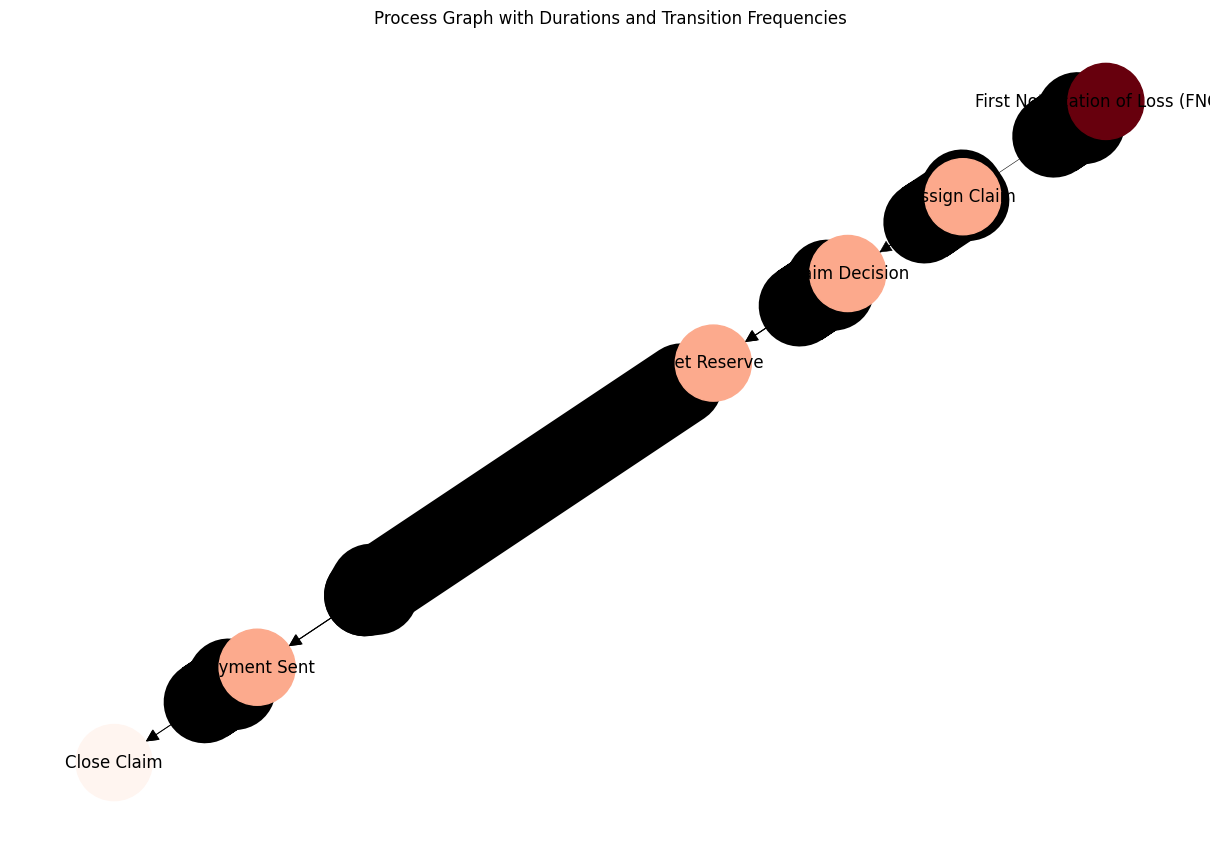

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Create a directed graph
G = nx.DiGraph()

# Count transitions for edge thickness
edge_counts = defaultdict(int)
for case_id, group in df.groupby("case_id"):
    activities = group["activity"].tolist()
    durations = group["duration_hours"].tolist()
    for i in range(len(activities) - 1):
        edge = (activities[i], activities[i+1])
        edge_counts[edge] += 1

# Add nodes with average duration as attribute
avg_durations = df.groupby("activity")["duration_hours"].mean().to_dict()
for activity, duration in avg_durations.items():
    G.add_node(activity, duration=duration)

# Add edges with counts
for (src, dst), count in edge_counts.items():
    G.add_edge(src, dst, weight=count)

# Draw the graph
plt.figure(figsize=(12,8))

# Position nodes using spring layout
pos = nx.spring_layout(G, seed=42)

# Node colors = duration (longer = redder)
node_colors = [G.nodes[n]["duration"] for n in G.nodes()]
# Normalize colors
node_colors = [c / max(node_colors) for c in node_colors]

# Edge widths = frequency of transition
edge_widths = [G.edges[e]["weight"]/500 for e in G.edges()]  # divide to scale

nx.draw(G, pos, with_labels=True, node_size=3000,
        node_color=node_colors, cmap=plt.cm.Reds,
        width=edge_widths, arrowsize=20, font_size=12)

plt.title("Process Graph with Durations and Transition Frequencies")
plt.show()


In [16]:
!pip install pygraphviz
# If it fails, also install graphviz system package from https://graphviz.org/download/


  Using cached pygraphviz-1.14.tar.gz (106 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pygraphviz


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [88 lines of output]
  C:\Users\User\AppData\Local\Temp\pip-build-env-ot3dmf6x\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
  !!
  
          ********************************************************************************
          Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
  
          By 2027-Feb-18, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    corresp(dist, value, root_dir)
  C:\Users\User\AppData\Local\Temp\pip-build-en

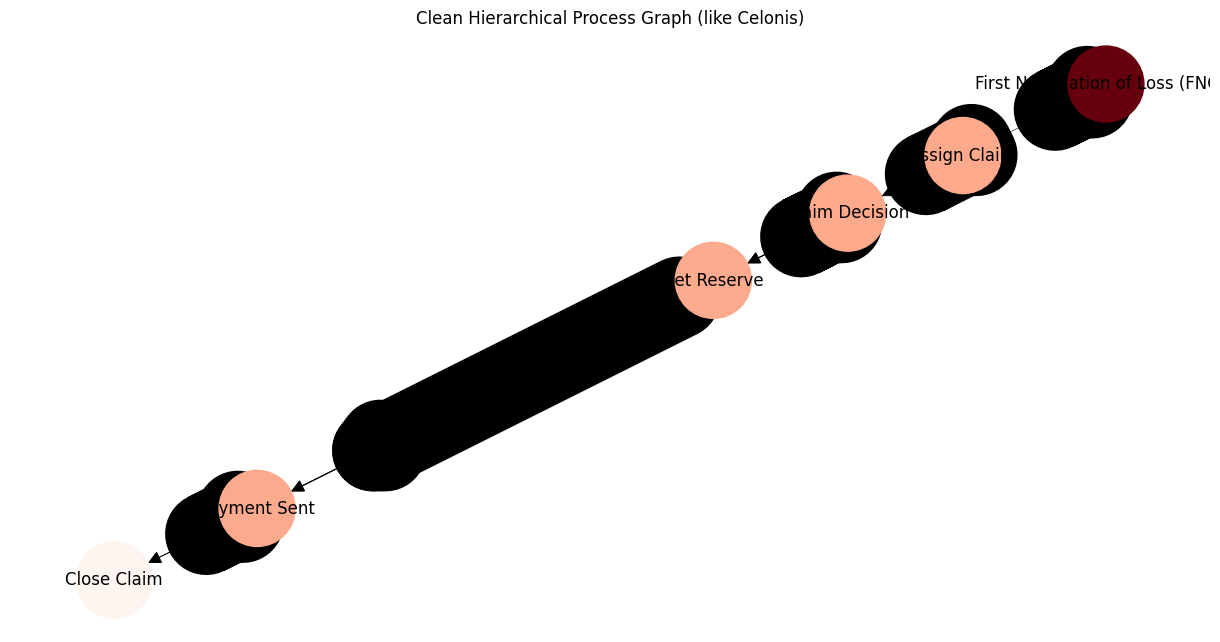

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Add nodes with duration info
avg_durations = df.groupby("activity")["duration_hours"].mean().to_dict()
for activity, duration in avg_durations.items():
    G.add_node(activity, duration=duration)

# Add edges with frequency
from collections import defaultdict
edge_counts = defaultdict(int)
for case_id, group in df.groupby("case_id"):
    activities = group["activity"].tolist()
    for i in range(len(activities) - 1):
        edge_counts[(activities[i], activities[i+1])] += 1

for (src, dst), count in edge_counts.items():
    G.add_edge(src, dst, weight=count)

# Draw with hierarchical layout
try:
    pos = nx.nx_agraph.graphviz_layout(G, prog='dot')  # left-to-right hierarchy
except:
    pos = nx.spring_layout(G, seed=42)  # fallback

plt.figure(figsize=(12,6))

# Node color = duration
node_colors = [avg_durations[n] for n in G.nodes()]
node_colors = [c / max(node_colors) for c in node_colors]

# Edge width = frequency
edge_widths = [G.edges[e]["weight"]/500 for e in G.edges()]

nx.draw(G, pos, with_labels=True, node_size=3000,
        node_color=node_colors, cmap=plt.cm.Reds,
        width=edge_widths, arrowsize=20, font_size=12)

plt.title("Clean Hierarchical Process Graph (like Celonis)")
plt.show()


In [18]:
!pip install pm4py



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import os
import shutil

# Check if 'dot' is findable
dot_path = shutil.which("dot")
print(f"Path to dot: {dot_path}")

# If it prints 'None', the PATH isn't updated for this process.
# Print the full path list to double check:
print("Current PATH seen by Python:")
print(os.environ["PATH"])

Path to dot: None
Current PATH seen by Python:
C;C:\Users\User\projects\process-mining-prototype\venv\Scripts;C:\Users\User\bin;C:\Program Files\Git\mingw64\bin;C:\Program Files\Git\usr\local\bin;C:\Program Files\Git\usr\bin;C:\Program Files\Git\usr\bin;C:\Program Files\Git\mingw64\bin;C:\Program Files\Git\usr\bin;C:\Users\User\bin;E:\VMWare\bin;C:\Program Files\Microsoft\jdk-11.0.28.6-hotspot\bin;C:\Program Files\Common Files\Oracle\Java\javapath;C:\Program Files (x86)\Razer Chroma SDK\bin;C:\Program Files\Razer Chroma SDK\bin;C:\Program Files (x86)\Razer\ChromaBroadcast\bin;C:\Program Files\Razer\ChromaBroadcast\bin;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\Cloudflare\Cloudflare WARP;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.

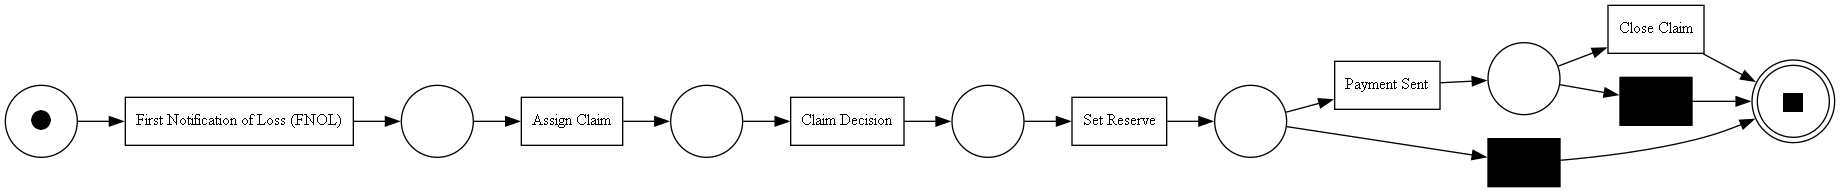

In [24]:
import pandas as pd
import pm4py
from pm4py.objects.log.util import dataframe_utils
import os

# -----------------------------
# FIX: Environment Path for venv
# -----------------------------
# This tells your virtual environment exactly where to find the 'dot' engine.
# Double-check that this folder actually exists on your machine!
graphviz_bin_path = r'C:\Program Files\Graphviz\bin' 
if graphviz_bin_path not in os.environ["PATH"]:
    os.environ["PATH"] += os.pathsep + graphviz_bin_path

# -----------------------------
# Step 1: Prepare DataFrame
# -----------------------------
# Assuming 'df' is your source data
df_pm = df[['case_id', 'activity', 'timestamp']].copy()

df_pm = df_pm.rename(columns={
    'case_id': 'case:concept:name',
    'activity': 'concept:name',
    'timestamp': 'time:timestamp'
})

df_pm['time:timestamp'] = pd.to_datetime(df_pm['time:timestamp'])
df_pm = df_pm.sort_values(['case:concept:name', 'time:timestamp'])
df_pm = dataframe_utils.convert_timestamp_columns_in_df(df_pm)

# -----------------------------
# Step 2: Discover Process Model
# -----------------------------
net, initial_marking, final_marking = pm4py.discover_petri_net_heuristics(df_pm)

# -----------------------------
# Step 3: Compute Bottlenecks
# -----------------------------
df_pm['next_timestamp'] = df_pm.groupby('case:concept:name')['time:timestamp'].shift(-1)
df_pm['duration_hours'] = (df_pm['next_timestamp'] - df_pm['time:timestamp']).dt.total_seconds() / 3600

# Average duration per activity (fill 0 for end events)
avg_duration = df_pm.groupby('concept:name')['duration_hours'].mean().fillna(0).to_dict()

# -----------------------------
# Step 4: Map Colors (Red = Slow, Green = Fast)
# -----------------------------
max_dur = max(avg_duration.values()) if avg_duration.values() else 1
node_colors = {}

for act, dur in avg_duration.items():
    intensity = int(min(dur / max_dur * 255, 255))
    red = intensity
    green = 255 - intensity
    node_colors[act] = f"#{red:02x}{green:02x}00"

# -----------------------------
# Step 5: Inject Colors & Visualize
# -----------------------------
for transition in net.transitions:
    if transition.label in node_colors:
        color = node_colors[transition.label]
        transition.properties["fillcolor"] = color
        transition.properties["color"] = "black"
        transition.properties["style"] = "filled"

# Render the result
try:
    pm4py.view_petri_net(net, initial_marking, final_marking, format="png")
except Exception as e:
    print(f"Visualization failed. Ensure Graphviz is installed at: {graphviz_bin_path}")
    print(f"Error details: {e}")

In [25]:
# Calculate total duration per case
case_analysis = df.groupby('case_id').agg(
    start_time=('timestamp', 'min'),
    end_time=('timestamp', 'max'),
    activities_count=('activity', 'count'),
    claim_amount=('claim_amount', 'first') # Assuming claim amount is static per case
).reset_index()

# Calculate throughput in days
case_analysis['throughput_days'] = (
    case_analysis['end_time'] - case_analysis['start_time']
).dt.total_seconds() / 86400

# Basic stats for your "Executive Summary"
print(f"Total Cases Analyzed: {len(case_analysis)}")
print(f"Average Throughput: {case_analysis['throughput_days'].mean():.1f} days")
print(f"Median Throughput: {case_analysis['throughput_days'].median():.1f} days")
print(f"Standard Deviation: {case_analysis['throughput_days'].std():.1f} days")

Total Cases Analyzed: 30000
Average Throughput: 35.0 days
Median Throughput: 35.0 days
Standard Deviation: 4.5 days


In [27]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


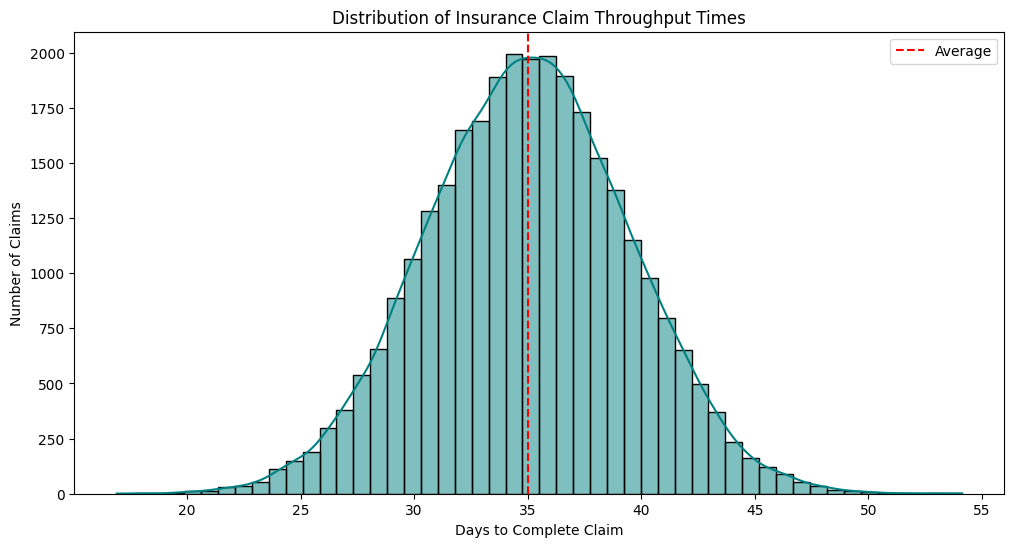

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(case_analysis['throughput_days'], bins=50, kde=True, color='teal')
plt.axvline(case_analysis['throughput_days'].mean(), color='red', linestyle='--', label='Average')
plt.title('Distribution of Insurance Claim Throughput Times')
plt.xlabel('Days to Complete Claim')
plt.ylabel('Number of Claims')
plt.legend()
plt.show()